In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
from errorResult import MSE
from errorResult import RMSE
from errorResult import jdwucha
from errorResult import xdwucha
from errorResult import fanguiy
from errorResult import result
from errorResult import drawAll

In [2]:
def errorLp(W,data,data_front,time):
    A1 = cala(W,data,data_front,time)                 #更新后的矩阵
    dist = np.linalg.norm(A1 - data)/ItemNum1         #预测矩阵与真实矩阵的欧式距离
    return dist

def initialization(pop_size,A,data,data_front):
    B1 = [0]*pop_size                                        #对应误差
    for i in range (pop_size):
        B1[i] = errorLp(A[i], data, data_front ,ItemNum1)                 #计算初始种群的误差

    j = B1[B1.index(min(B1))]
    g = B1.index(min(B1))
    b = B1.index(max(B1))
    bestw= A[g]
    
    return bestw,j,b                                         #返回最好的权重和误差,和最坏的下标

def f(x):
    y = 1/(1+np.exp(-x))
    return y

def cala(W,data,data_front,time):
    A2 = [0] * time
    A2[0] = f(np.dot(data_front,W))
    for i in range(1,time):
        A2[i] = f(np.dot(data[i-1], W))
        #A2[i + 1] = f(temp)
    return A2

def cala1(W,data):
    A2 = np.zeros(data.shape[0])
    for j in range(data.shape[0]):
        temp = np.dot(W[j],data)
        A2[j] = f(temp)
    return A2

def caa(W,data):
    A2 = [0]*a
    for o in range (0,a):
        temp = np.dot(data,W)
        A2 = f(temp)
    return A2

In [3]:
def crossover(A):#融合交叉
    #A = list(A)
    nA = [0]*pop_size

    for i in range (0,int(pop_size/2)):
        if random.random() < pop_cr:

            r = random.random()
            R1 = np.array([[r] * ItemNum2 for i in range(ItemNum2)])
            R2 = np.array([[1-r] * ItemNum2 for i in range(ItemNum2)])

            nA[2 * i] = (R1 * np.array(A[2 * i]) + R2 * np.array(A[2 * i+1]))
            nA[2 * i+1] = (R1 * np.array(A[2 * i+1])+ R2 * np.array(A[2 * i]))
        else:
            nA[2 * i] = A[2 * i]
            nA[2 * i+1] = A[2 * i+1]
    return nA

def mutation(A):
    for i in range(0,pop_size):
        A[i] = np.array(A[i])
        if random.random() < pop_mr:
            step = random.uniform(0,0.1)
            step1= np.array([[step] * 6 for i in range(6)])
            if random.random()< 0.1:
                A[i] = A[i] - step1
            else:
                A[i] = A[i] + step1
    return A

def newA(BESTW,A,data,data_front ,k,m):                                          
    #生成新的种群和更新最优权重矩阵
    A = crossover(A)
    A = mutation(A)

    BESTWtemp,j,p = initialization(pop_size, A, data, data_front)
    if j<=k:
        BESTW = BESTWtemp  #留下每一代最好的权重矩阵
        k = j
    A[p] = BESTW
    return A,BESTW,k

In [4]:
arr1 = pd.read_csv('dataProcess.csv',index_col = 0)
data1 = np.array(arr1)
if __name__ == '__main__':
    pop_size = 8  # 初始种群个数
    pop_cr = 0.7  # 交叉概率
    pop_mr = 0.3  # 变异概率
    pop_ma = 1  # 变异系数
    iternum = 100
    w = 504        #滑动窗口大小
    a = 1      #预测未来一小时的
    start = 0
    dataf = pd.read_csv('dataProcess.csv',index_col = 0)
    data2 = dataf.iloc[w + start:w + iternum + start,:]

    Num1=data2.shape[0]                             #测试集行数100
    Num2=data2.shape[1]                             #列数6

    data_pred = [0]*iternum
    
    data = data1[start:start+ w, :]    
    data_front = data1[start-1]
    ItemNum1 = data.shape[0]  # 训练集行数504
    ItemNum2 = data.shape[1]  # 列数6
    
    
    #############################################训练
    ed = [0]*800
    A = [0] * pop_size  # 初始种群
    for j in range(pop_size):
        #A[j] = -1 + 2 * np.random.random((ItemNum2, ItemNum2))
        A[j] = -1 + 2 * np.random.uniform(0,1,(ItemNum2, ItemNum2))
    
    bestw, k, m = initialization(pop_size, A, data, data_front)
    for op in range(800):
        A, bestw,k = newA(bestw, A, data, data_front, k, m)
        ed[op] = k
        
    #############################################预测
    for i in range(0,iternum):
        data_test = data1[i + start + w-1]  # 测试输入
        data_pred[i] = cala1(bestw,data_test)

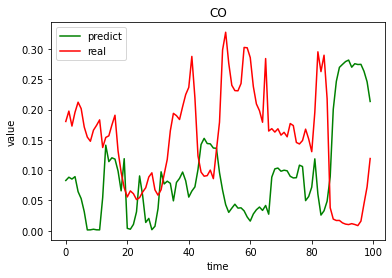

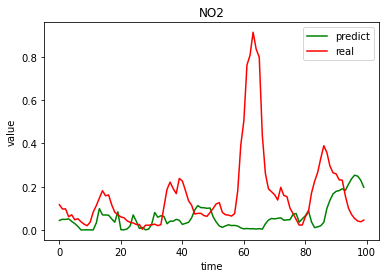

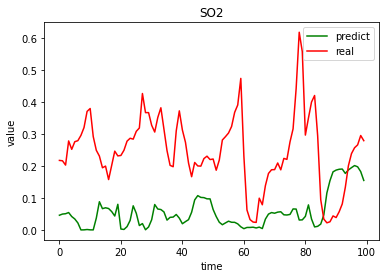

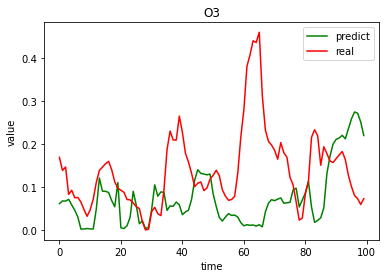

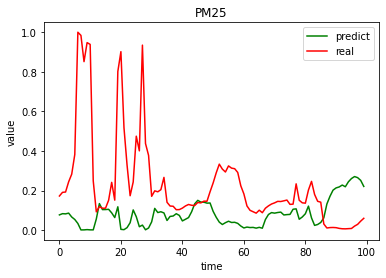

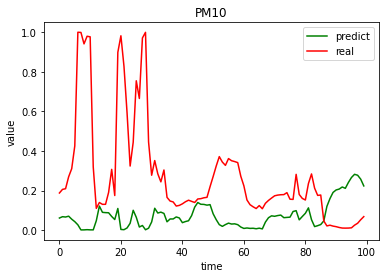

绝对误差：[0.12663204 0.1320732  0.20445045 0.09734025 0.20035622 0.25346324]
相对误差：[2.66729485 0.88183376 0.91729016        inf 2.74119957 2.1263965 ]
欧式距离：0.06107145876968907
MSE：[0.02282117 0.05095623 0.05476363 0.01892254 0.09371943 0.13178931]
RMSE:[0.15106678 0.22573487 0.23401631 0.13755922 0.30613629 0.36302797]


E:\gitfile\FCM\errorResult.py:14: RuntimeWarning: divide by zero encountered in true_divide
  dist_temp = (np.abs((data1 - data2)/data2))/(data2.shape[0])


In [5]:
#print(bestw)                  # 最优权重矩阵展示

#最优权重矩阵做预测
data_pre = np.array(data_pred)                    #预测出的数据
data_test = np.array(data2)
#A1 = fanguiy(A1)                           #反归一化后的预测数据

drawAll(data_pre,data_test)
result(data_pre,data_test,'rcga')

<function matplotlib.pyplot.show(*args, **kw)>

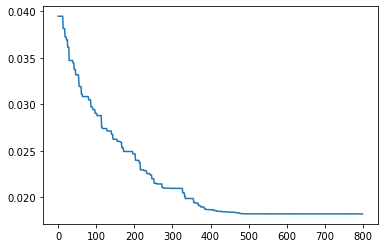

In [6]:
plt.plot(ed)
plt.show